In [19]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import expit
import seaborn as sns

# Logistic regression

In [11]:
data_logistic=pd.read_csv("/Users/ayankundu/Documents/logistic_data.csv")

In [12]:
data_logistic.head()

,gpa,work_experience,admitted
0,2.7,4,0
1,3.3,6,1
2,3.3,5,1
3,1.7,4,0
4,4.0,4,1


<IPython.core.display.Javascript object>


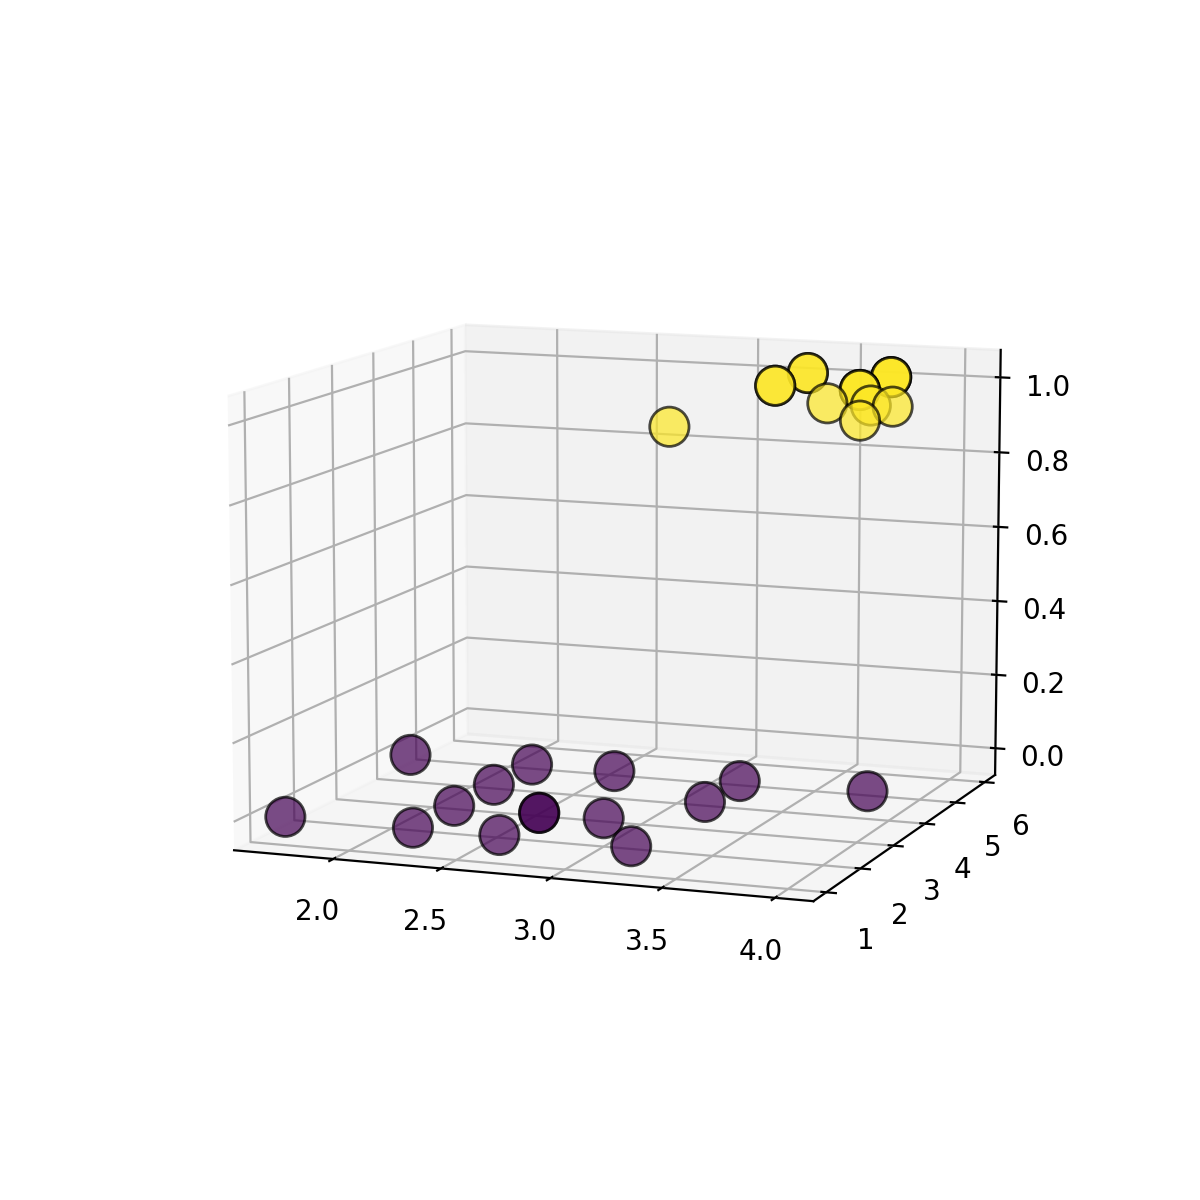

In [30]:
%matplotlib notebook
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_logistic['gpa'], data_logistic['work_experience'], data_logistic['admitted'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data_logistic['admitted'])
plt.show()

In [14]:
x=data_logistic.iloc[:,:2]
y=data_logistic.iloc[:,-1]

In [15]:
# Logistic regression model
model_logistic = sm.GLM(y,(sm.add_constant(x)), family = sm.families.Binomial())
res_logistic=model_logistic.fit()
print(res_logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               admitted   No. Observations:                   30
Model:                            GLM   Df Residuals:                       27
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.4289
Date:                Tue, 09 Nov 2021   Deviance:                       14.858
Time:                        22:42:51   Pearson chi2:                     20.6
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.5190      6.194     

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
res_logistic.params

const             -15.519028
gpa                 3.550952
work_experience     1.019139
dtype: float64

<IPython.core.display.Javascript object>


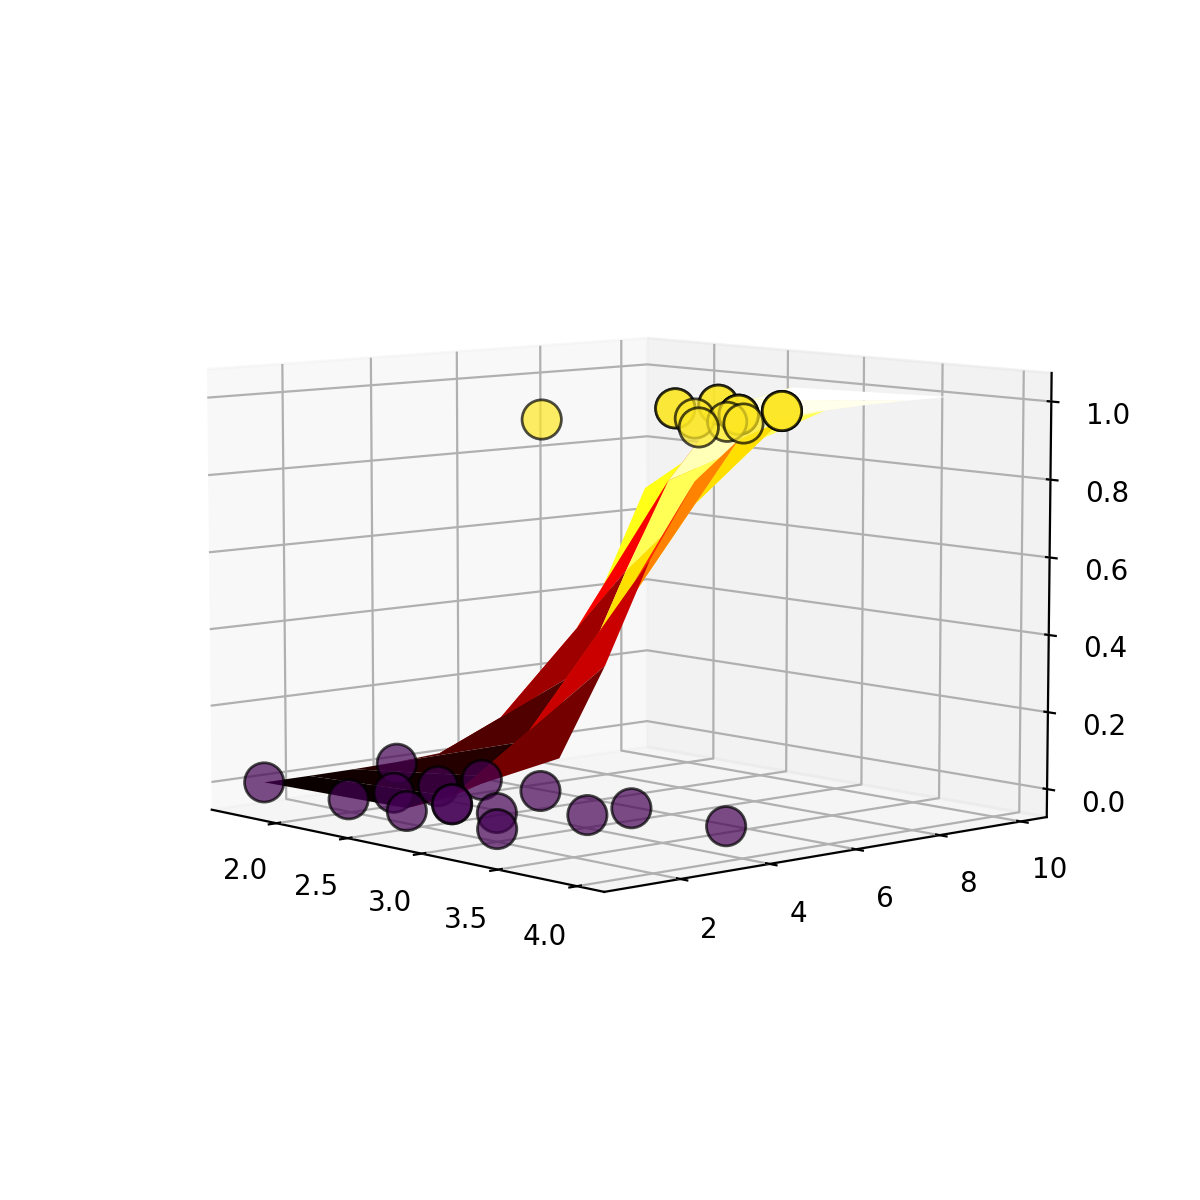

In [17]:
%matplotlib notebook
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_logistic['gpa'], data_logistic['work_experience'], data_logistic['admitted'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data_logistic['admitted'])

x1=np.arange(data_logistic['gpa'].min(),data_logistic['gpa'].max())
x2= np.arange(data_logistic['work_experience'].min(),data_logistic['work_experience'].max()+5)
xs, ys = np.meshgrid(x1, x2)
zs= expit(xs * res_logistic.params[1]+ys * res_logistic.params[2]+ res_logistic.params[0])
ax.plot_surface(xs, ys, zs, cmap='hot')
plt.show()

# Poisson regression

In [3]:
data_poisson=pd.read_csv("/Users/ayankundu/Documents/count_data.csv")

In [4]:
data_poisson.head()

,Awards,Math Score,Science Score
0,0,43,45
1,0,38,41
2,0,41,54
3,0,33,55
4,0,39,67


<IPython.core.display.Javascript object>


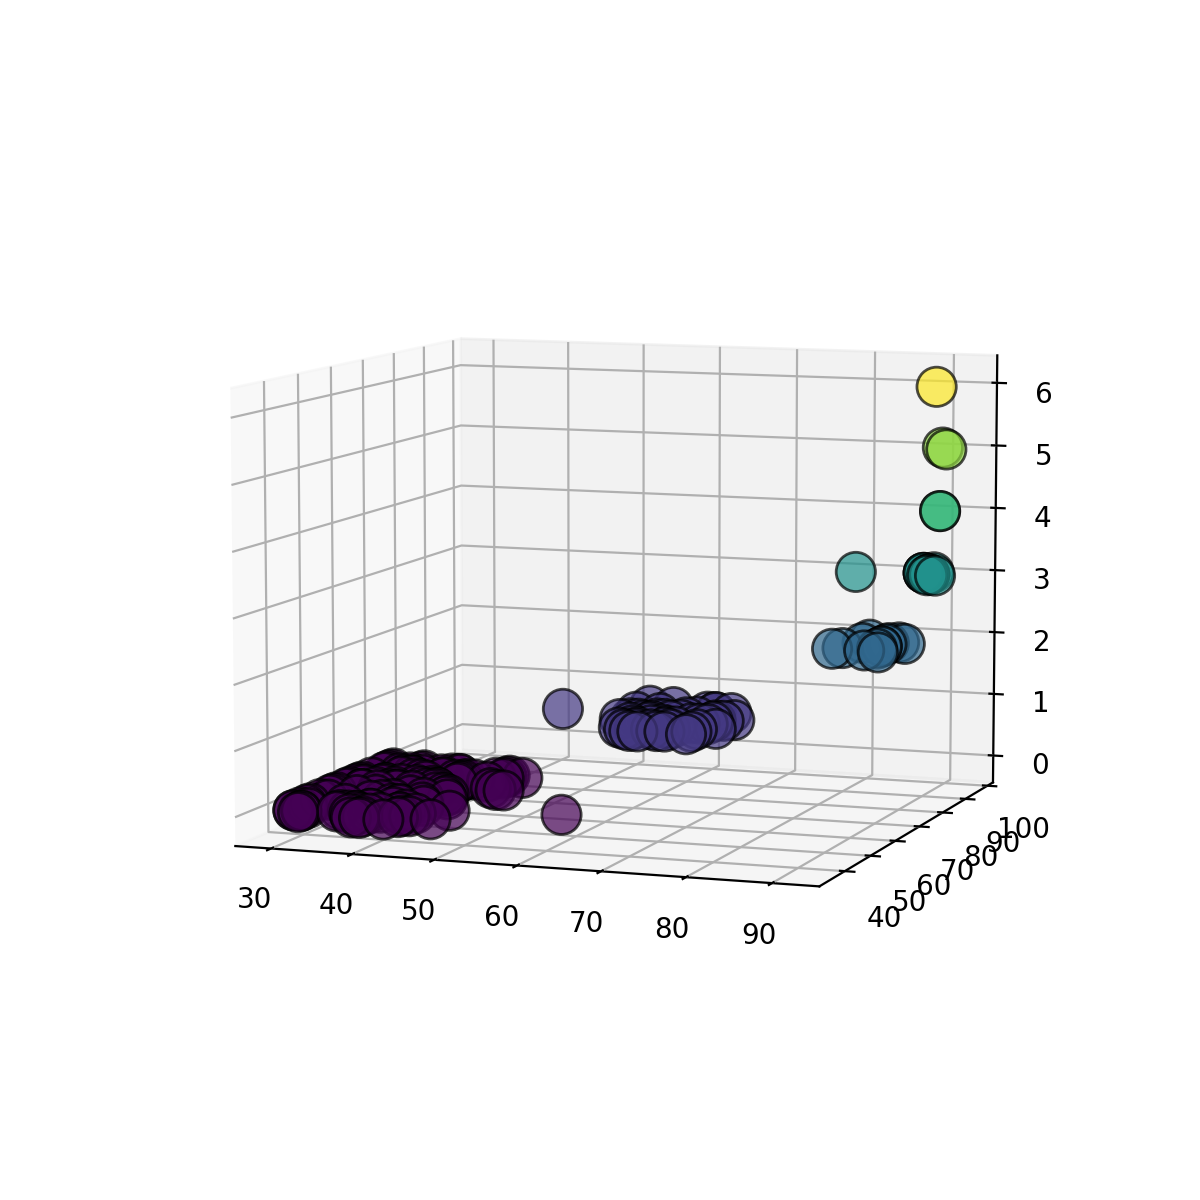

In [31]:
%matplotlib notebook
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_poisson['Math Score'], data_poisson['Science Score'], data_poisson['Awards'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data_poisson['Awards'])
plt.show()

In [6]:
x=data_poisson.iloc[:,1:3]
y=data_poisson.iloc[:,0]

In [8]:
# Poisson regression model
model_poisson = sm.GLM(y,(sm.add_constant(x)), family = sm.families.Poisson(sm.families.links.log))
res_poisson=model_poisson.fit()
print(res_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      197
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.89
Date:                Tue, 09 Nov 2021   Deviance:                       39.724
Time:                        22:42:15   Pearson chi2:                     36.5
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.4636      0.511    -10.692

/var/folders/mz/wy7f4z3x3c76_91xwdrqr6280000gn/T/ipykernel_13717/684516551.py:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  model_poisson = sm.GLM(y,(sm.add_constant(x)), family = sm.families.Poisson(sm.families.links.log))


In [9]:
res_poisson.params

const           -5.463635
Math Score       0.080471
Science Score   -0.004323
dtype: float64

<IPython.core.display.Javascript object>


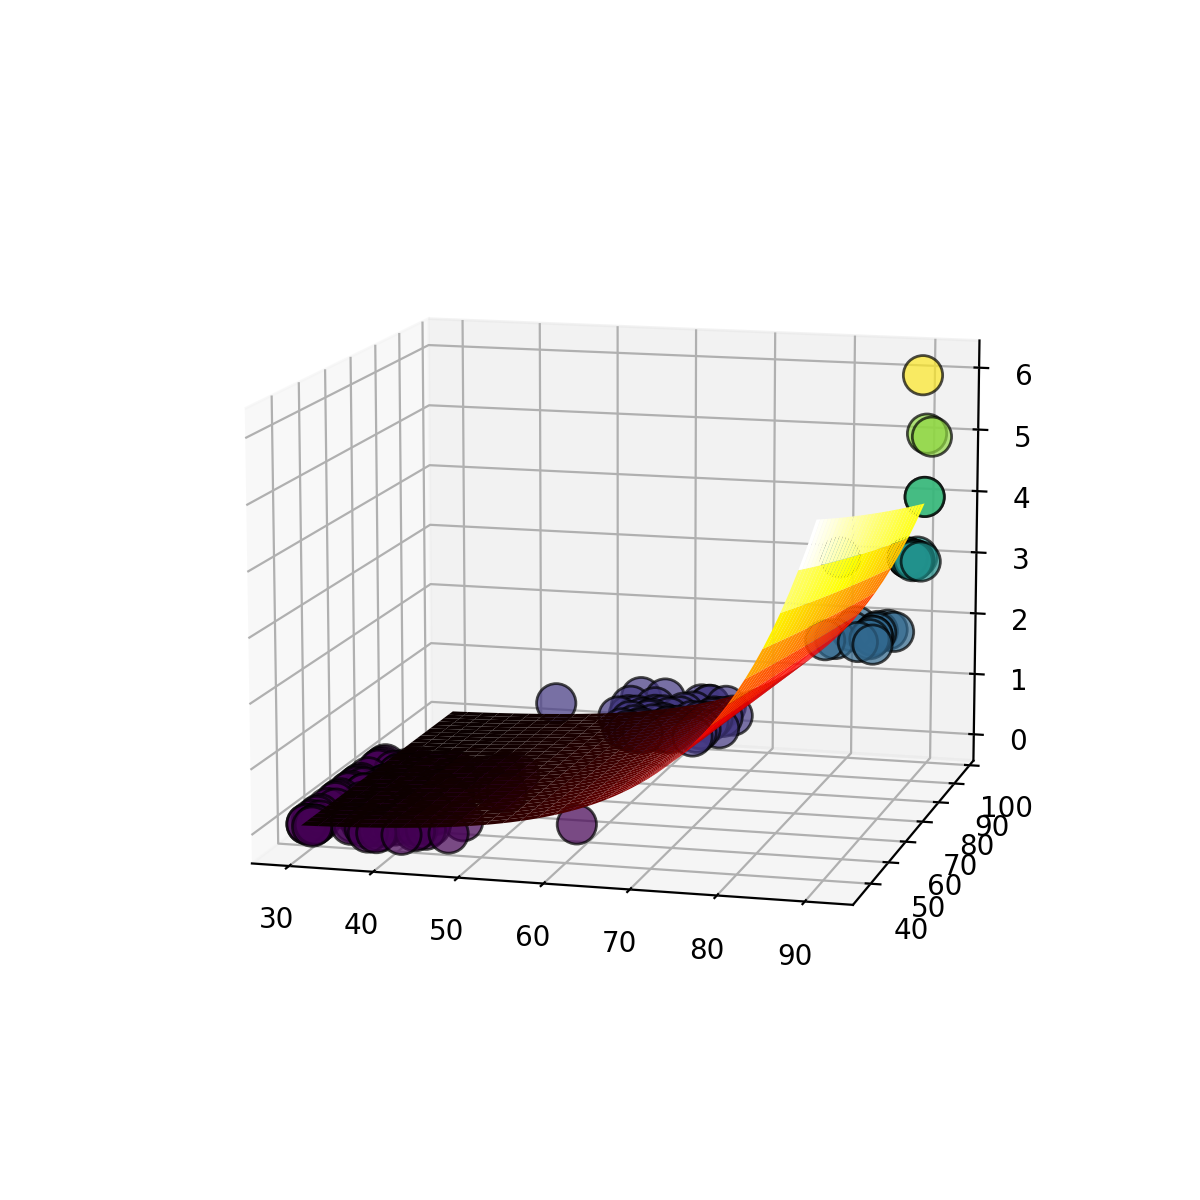

In [10]:
%matplotlib notebook
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_poisson['Math Score'], data_poisson['Science Score'], data_poisson['Awards'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data_poisson['Awards'])
x1=np.arange(data_poisson['Math Score'].min(),data_poisson['Math Score'].max())
x2= np.arange(data_poisson['Science Score'].min(),data_poisson['Science Score'].max())
xs, ys = np.meshgrid(x1, x2)
zs= np.exp(xs * res_poisson.params[1]+ys * res_poisson.params[2]+ res_poisson.params[0])
ax.plot_surface(xs, ys, zs, cmap='hot')
plt.show()


# Linear Regression

In [25]:
data_linear=pd.read_csv("/Users/ayankundu/Documents/linear_data.csv")

In [32]:
data_linear.head()

,horsepower,acceleration,mpg
0,130.0,12.0,18.0
1,165.0,11.5,15.0
2,150.0,11.0,18.0
3,150.0,12.0,16.0
4,140.0,10.5,17.0


In [26]:
x=data_linear[['horsepower','acceleration']]
y=data_linear['mpg']

<IPython.core.display.Javascript object>


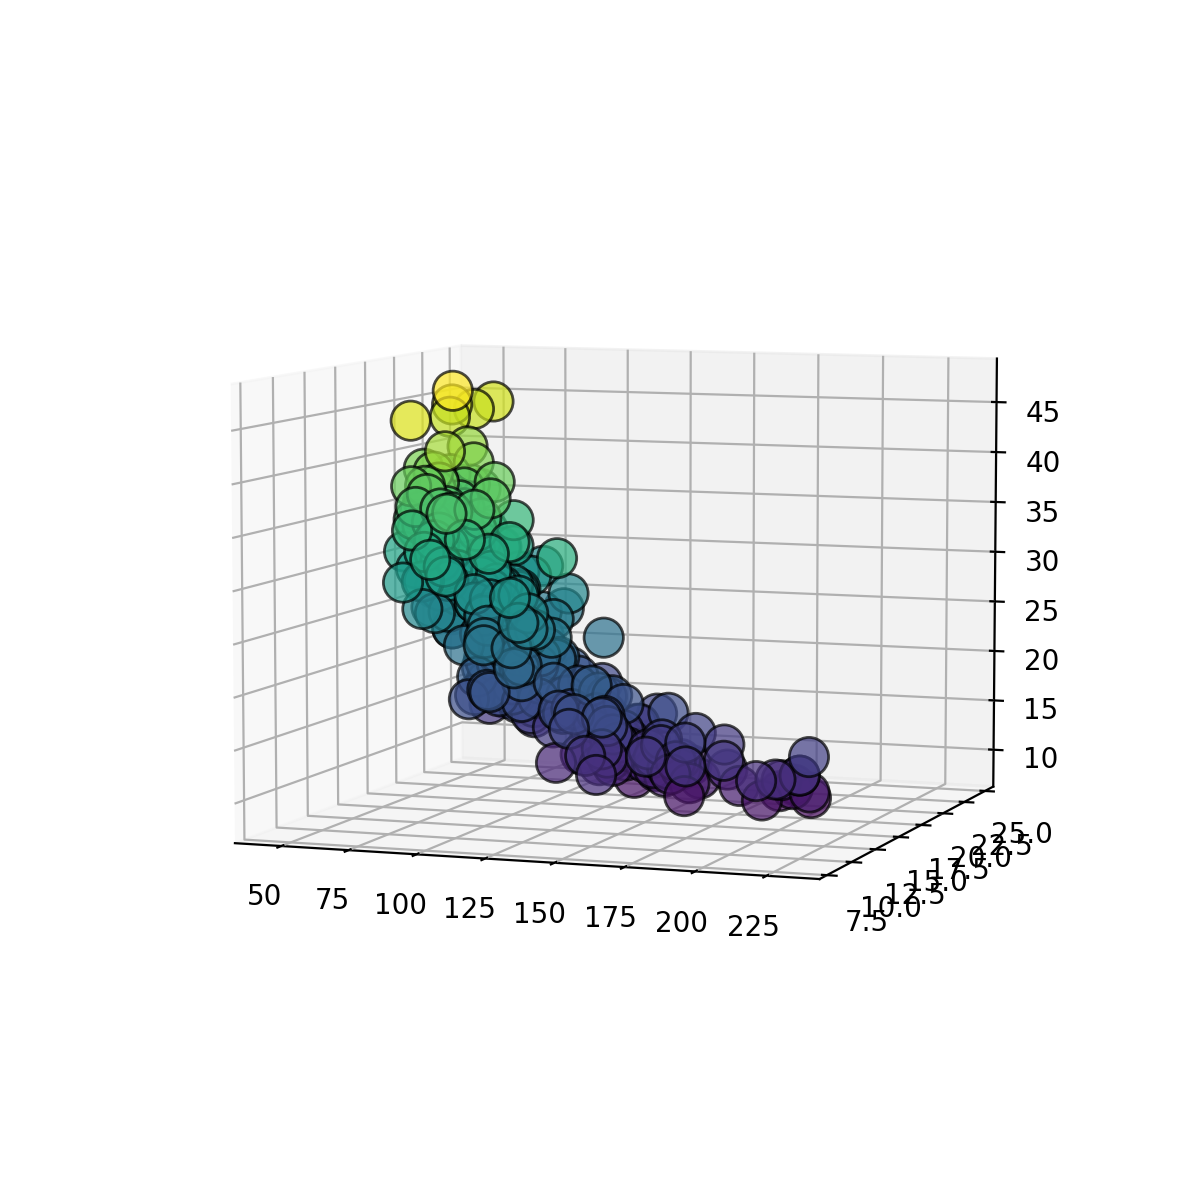

In [27]:
%matplotlib notebook
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_linear['horsepower'], data_linear['acceleration'], data_linear['mpg'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data_linear['mpg'])

In [28]:
# Linear regression model
model_linear = sm.GLM(y,(sm.add_constant(x)), family = sm.families.Gaussian())
res_linear=model_linear.fit()
print(res_linear.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    mpg   No. Observations:                  392
Model:                            GLM   Df Residuals:                      389
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          22.635
Method:                          IRLS   Log-Likelihood:                -1166.1
Date:                Tue, 09 Nov 2021   Deviance:                       8805.0
Time:                        22:47:24   Pearson chi2:                 8.80e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           52.5593      2.587     20.316   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>


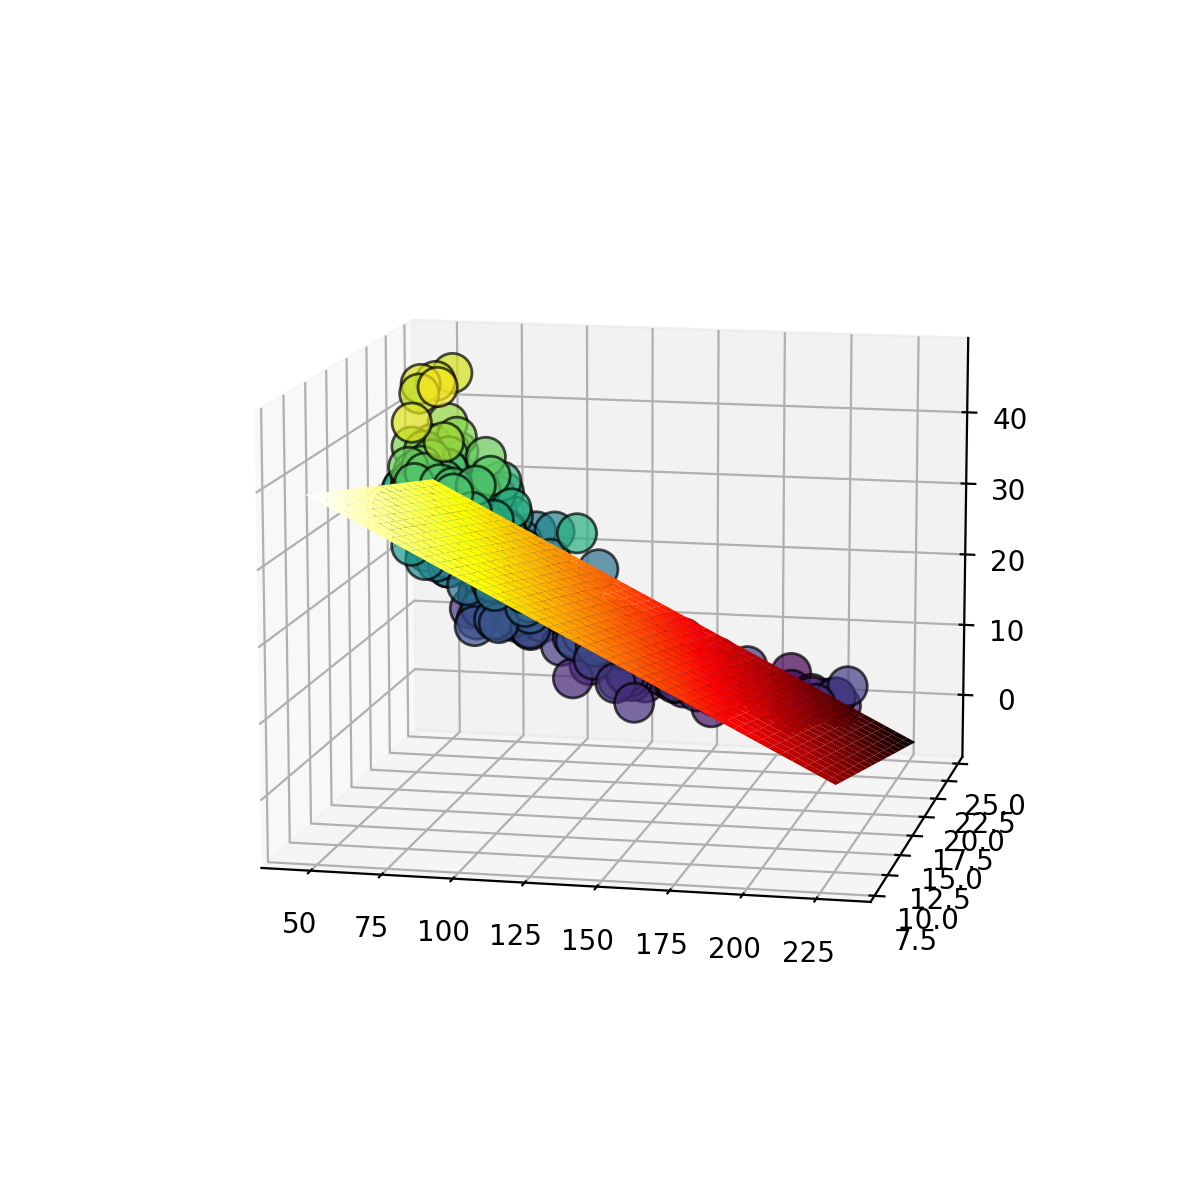

In [29]:
%matplotlib notebook
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_linear['horsepower'], data_linear['acceleration'], data_linear['mpg'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data_linear['mpg'])

x1=np.arange(data_linear['horsepower'].min(),data_linear['horsepower'].max())
x2= np.arange(data_linear['acceleration'].min(),data_linear['acceleration'].max())
xs, ys = np.meshgrid(x1, x2)
zs= xs * res_linear.params[1]+ys * res_linear.params[2]+ res_linear.params[0]
ax.plot_surface(xs, ys, zs, cmap='hot')
plt.show()